# Linear Regression

#### 21BCE5715  - Mahika Annie Verghese
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The libraries are pandas, numpy, matplotlib, and seaborn. The modules are pyplot from matplotlib and sns from seaborn. The %matplotlib inline is a command that makes the plots appear in the notebook without using the show () function. 

### Check data and explore

In [114]:
advertStats = pd.read_csv('advert.csv')

In [115]:
advertStats.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [116]:
advertStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [117]:
advertStats.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


This prints descriptive statistics of the dataframe advertStats.It shows the count, mean, standard deviation, minimum, maximum, and percentiles of each column in the dataframe.

In [118]:
advertStats.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


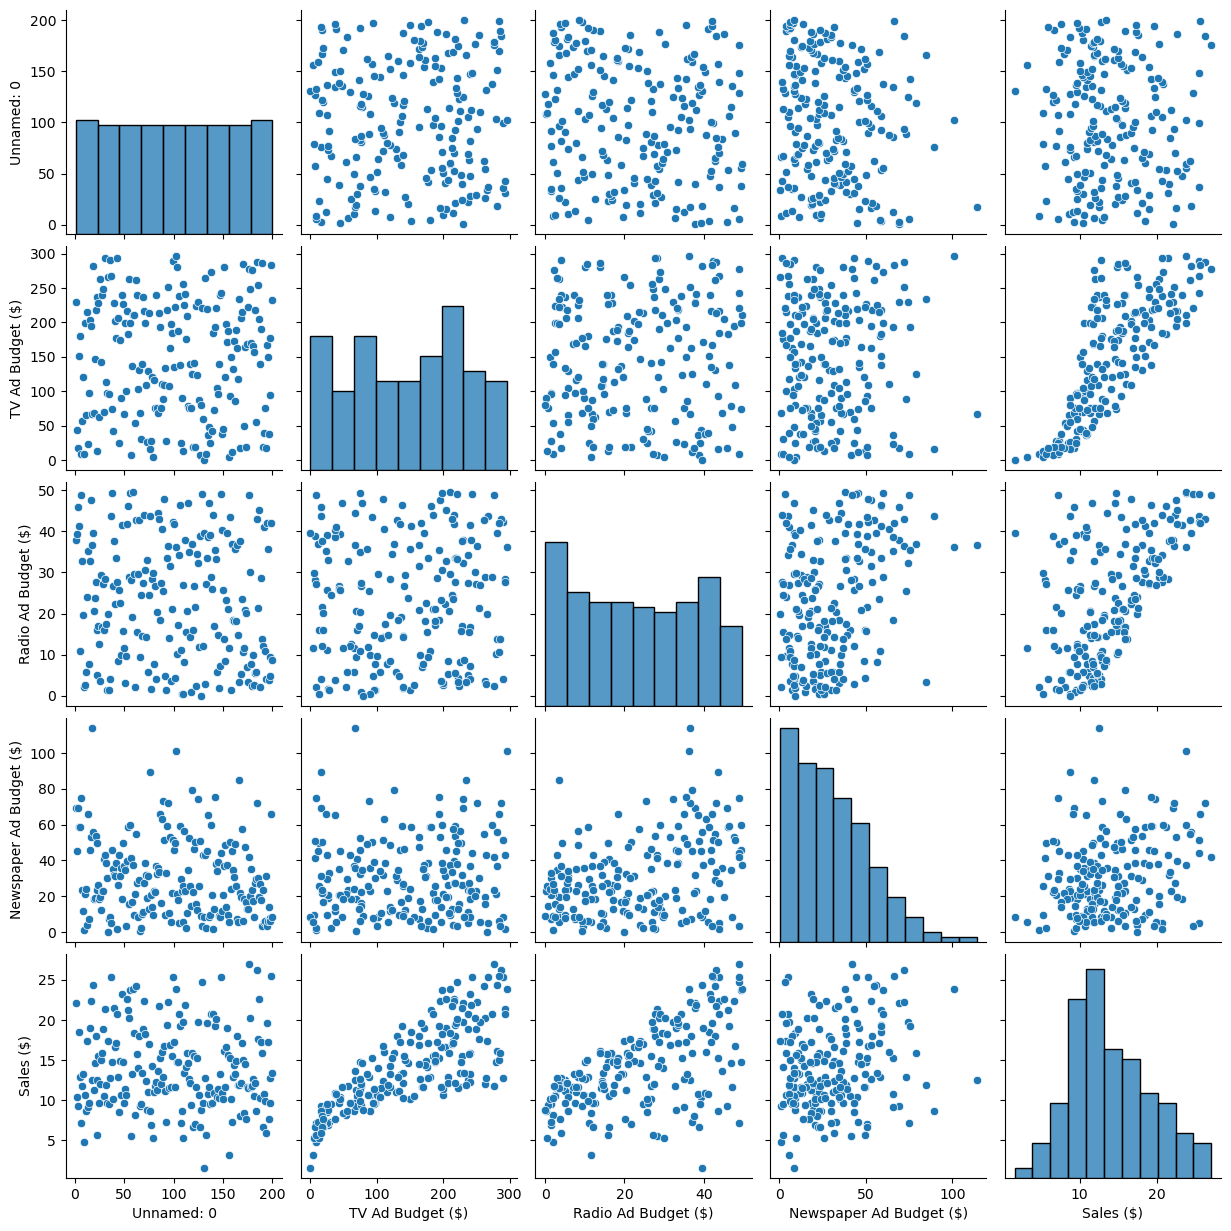

In [119]:
sns.pairplot(advertStats)

A pairplot is a type of plot that shows the pairwise relationships between the variables in the dataframe. It can also show the distribution of each variable along the diagonal.

C:\Users\mahik\AppData\Local\Temp\ipykernel_26228\1498120068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertStats['TV Ad Budget ($)'])


<Axes: xlabel='TV Ad Budget ($)', ylabel='Density'>

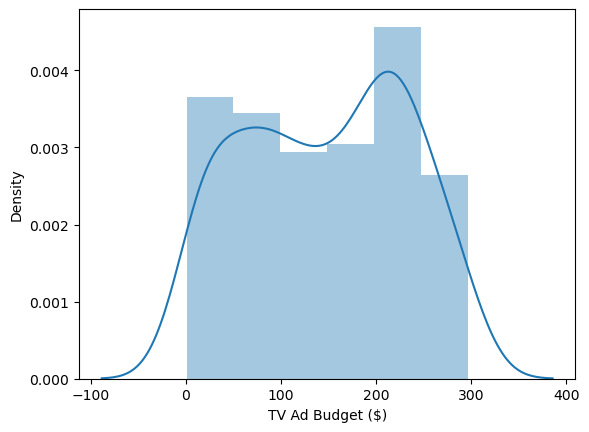

In [120]:
sns.distplot(advertStats['TV Ad Budget ($)'])

Here, we created a distribution plot of the TV Ad Budget column. A distribution plot shows the frequency of values in a column and the shape of the distribution. 

C:\Users\mahik\AppData\Local\Temp\ipykernel_26228\1694499176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertStats['Radio Ad Budget ($)'])


<Axes: xlabel='Radio Ad Budget ($)', ylabel='Density'>

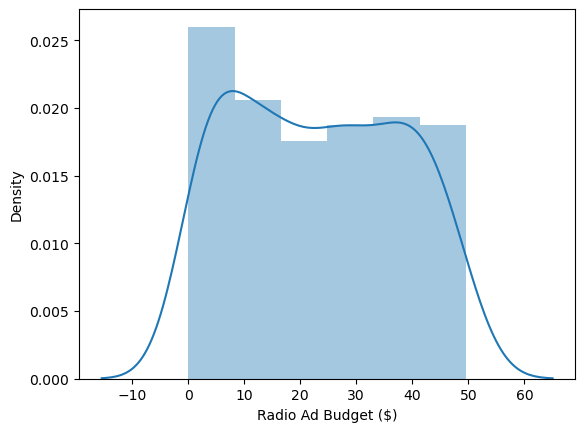

In [121]:
sns.distplot(advertStats['Radio Ad Budget ($)'])

<Axes: >

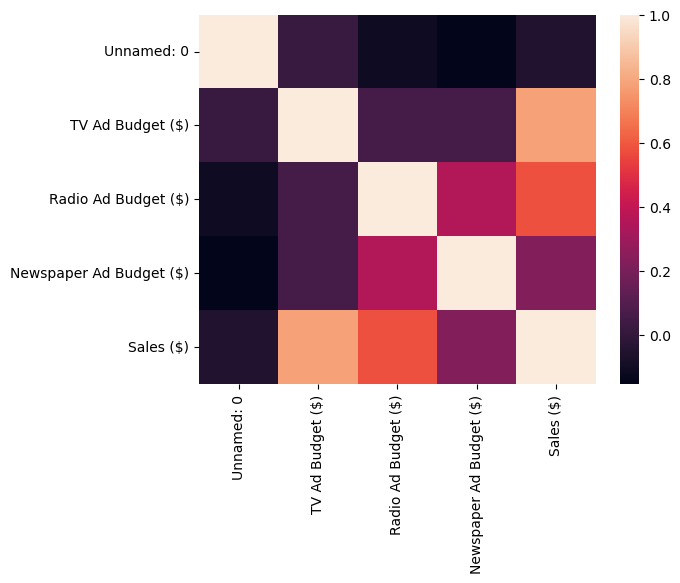

In [122]:
sns.heatmap(advertStats.corr())

A heatmap is a type of plot that shows the strength and direction of the relationship between the variables in the dataframe using colors. 

Here, we have created a heatmap of the correlation matrix of advertStats

## Training a Linear Regression Model

In [123]:
X = advertStats[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
Y = advertStats['Sales ($)']

In [124]:
X

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [126]:
Y 

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales ($), Length: 200, dtype: float64

## Split the data into training / testing set

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

The train_test_split function takes four arguments: X, Y, test_size, and random_state. X and Y are the features and labels of the data, test_size is the fraction of the data to use for testing, and random_state is a seed for the random number generator. The function returns four objects: X_train, X_test, y_train, and y_test, which are the features and labels for the training and testing sets.

Example, here 30% of the data is used for testing and 70% for training. And since we want to get the same split every time we run the code, we can set a fixed value for random_state, such as 101.

## Building the Model

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model1 =LinearRegression()

In [131]:
model1.fit(X_train,y_train)

LinearRegression()

Here we have used the LinearRegression class from the sklearn library to create and fit a linear regression model to the training data. The statement creates an object called model1, which is an instance of the LinearRegression class. The statement then calls the fit method of the model1 object, which takes two arguments: X_train and y_train, which are the features and labels of the training data. The fit method trains the model to find the best coefficients and intercept for the linear equation that minimizes the mean squared error.

## Model Evaluation

In [132]:
print(model1.intercept_) #print the intercept

3.151526768070653


This prints the intercept of the linear regression model that was fitted to the training data. The intercept is the value of the dependent variable when all the independent variables are zero. 

A negative value for the intercept of a linear regression model means that the line crosses the y-axis below the origin. This implies that the dependent variable has a negative value when the independent variables are zero.

In [133]:
coeff_df = pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV Ad Budget ($),0.044696
Radio Ad Budget ($),0.187566
Newspaper Ad Budget ($),-0.000323


The coeff_df variable will store a DataFrame with one column named ‘Coefficient’ and one row for each feature variable in the model. The values in the column will represent the estimated effect of each feature variable on the response variable, holding all other features constant.

In [134]:
model1.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

This will return an array of the coefficients. 

## Predictions from our Model

In [135]:
predictions = model1.predict(X_test)

The predictions variable will store an array of the predicted response values for each row in the test set X_test. The predict() method takes a two-dimensional array as an argument and returns an array of the same length as the number of rows in the input.

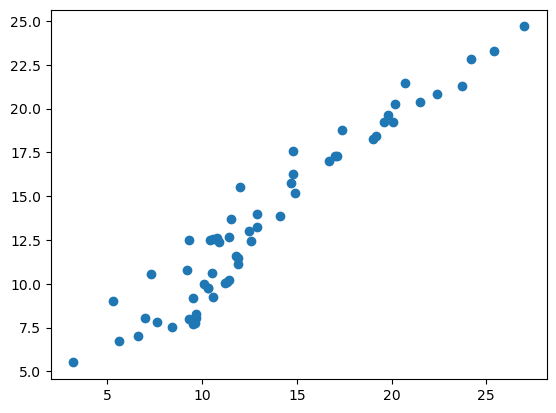

In [136]:
plt.scatter(y_test,predictions)

### Plot a histogram of the residuals and make sure it looks normally distributed.

C:\Users\mahik\AppData\Local\Temp\ipykernel_26228\4225196828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=10);


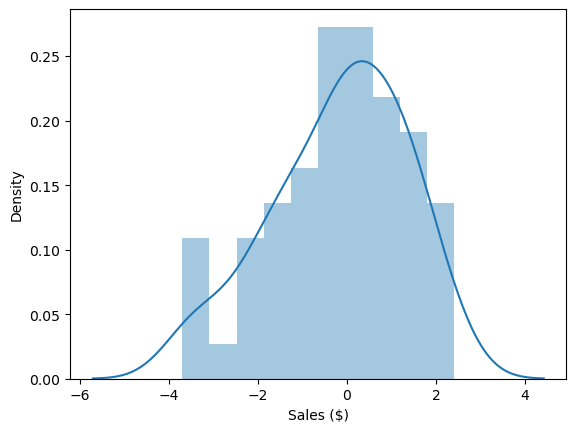

In [139]:
sns.distplot((y_test-predictions),bins=10);

The residuals are the differences between the actual and predicted values of the response variable in the test set. The bins parameter in sns.distplot() specifies the number or the boundaries of the bins for the histogram. A bin is a range of values that are grouped together in a bar. The height of the bar represents the frequency or count of values that fall into that bin. 

The histogram shows the frequency distribution of the residuals, which can help us check the normality assumption of the linear regression. Ideally, the residuals should be normally distributed with a mean of zero and a constant variance. This means that the histogram should look like a bell-shaped curve that is centered around zero and has a similar spread across the x-axis

## Regression Evaluation Metrics

In [140]:
from sklearn import metrics

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2137457736144803
MSE: 2.2987166978863782
RMSE: 1.516151937599388


These metrics measure how close the predicted values are to the actual values in the test set. The lower the error, the better the model fits the data. 

MAE is the average of the absolute differences between the predicted and actual values. It represents the magnitude of error without considering the direction. It is easy to interpret and less sensitive to outliers. However, it does not penalize large errors as much as MSE or RMSE.

MSE is the average of the squared differences between the predicted and actual values. It represents the variance of the error. It is more sensitive to outliers and large errors than MAE. However, it is harder to interpret because it is not in the same unit as the response variable

RMSE is the square root of MSE. It represents the standard deviation of the error. It is also sensitive to outliers and large errors, but it is easier to interpret than MSE because it is in the same unit as the response variable. It is one of the most commonly used metrics for regression problems